# Bitcoin wealth distribution
This notebook analyses the wealth distribution of Bitcoin. It builds on a [CSV file](data/bitcoin_balances_13052022.csv)
containing the richest bitcoin addresses and their balances. The balances were crawled from the
website [BitInfoCharts](https://bitinfocharts.com/en/top-100-richest-bitcoin-addresses.html) using
the script [execute_crawler.py](execute_crawler.py).

In order to crawl the latest Bitcoin balances, the script can be run again. Afterwards,
the variable CSV_PATH must be adjusted accordingly.

### Setup environment
Let's set up a data science environment

In [144]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sm
import quantecon as qe
from marx import crawler

In [145]:
# Configuration
DATA_PATH = "../data/"
CSV_PATH = DATA_PATH + "bitcoin_balances_13052022.csv"

### Load data
Load the richest bitcoin addresses and their balances from file

In [146]:
balances_frame = pd.read_csv(CSV_PATH)
balances_frame.head()

,rank,address,balance,crawled
0,1,34xp4vRoCGJym3xR7yCVPFHoCNxv4Twseowallet: Bina...,252597.0,2022-05-13
1,2,bc1qgdjqv0av3q56jvd82tkdjpy7gdp9ut8tlqmgrpmv24...,168010.0,2022-05-13
2,3,1P5ZEDWTKTFGxQjZphgWPQUpe554WKDfHQ,126238.0,2022-05-13
3,4,3LYJfcfHPXYJreMsASk2jkn69LWEYKzexbwallet: Bina...,116601.0,2022-05-13
4,5,bc1qazcm763858nkj2dj986etajv6wquslv8uxwczt,94643.0,2022-05-13


### Balance statistics
Calculate statistical key figures

In [155]:
# Print Statistics
balance_array = np.array(balances_frame["balance"])

print(f"N: {len(balance_array):,}")
print(f"Sum: {balance_array.sum():,}", "\n")

print(f"Min: {balance_array.min():,}")
print(f"Max: {balance_array.max():,}")
print(f"Mean: {balance_array.mean():,}")
print(f"Median: {np.median(balance_array):,}", "\n")

print("Gini:", qe.gini_coefficient(balance_array))

N: 10,000
Sum: 11,242,029.96 

Min: 167.08
Max: 252,597.0
Mean: 1,124.202996
Median: 460.07 

Gini: 0.6501769866861353


### Histogram
Plot a histogram to visualise the distribution of the balances

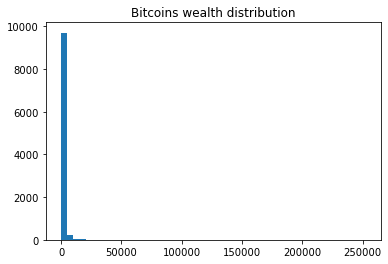

In [148]:
# Plot histogram
plt.figure()
plt.title("Bitcoins wealth distribution")
plt.hist(balance_array, bins=50)
plt.show()

### ECDF
Plot the  empirical cumulative distribution function (ECDF)

P(x<10**2): 0.000
P(x<10**3): 0.820
P(x<10**4): 0.992
P(x<10**5): 1.000


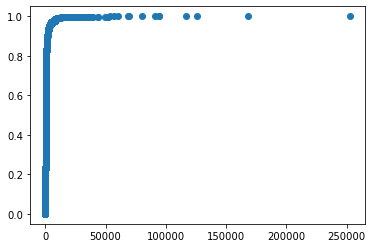

In [153]:
ecdf = sm.distributions.empirical_distribution.ECDF(balance_array)

print('P(x<10**2): %.3f' % ecdf(10**2))
print('P(x<10**3): %.3f' % ecdf(10**3))
print('P(x<10**4): %.3f' % ecdf(10**4))
print('P(x<10**5): %.3f' % ecdf(10**5))

plt.plot(ecdf.x, ecdf.y, "o")
plt.show()

### Lorenz curve
Plot a Lorenz curve to visualise the inequality of the balances

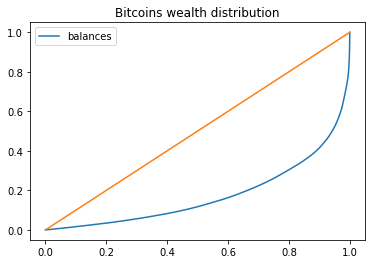

In [150]:
# Plot Lorenz curve
f_vals, l_vals = qe.lorenz_curve(balance_array)

fig, ax = plt.subplots()
ax.plot(f_vals, l_vals, label="balances")
ax.plot(f_vals, f_vals)
ax.legend()
plt.title("Bitcoins wealth distribution")
plt.show()

### Source

In [151]:
print("Balances crawled from:", crawler.FIRST_URL)
print("Crawling date:", balances_frame["crawled"].unique()[0])

Balances crawled from: https://bitinfocharts.com/en/top-100-richest-bitcoin-addresses.html
Crawling date: 2022-05-13
